# Import Libraries

In [38]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV



from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

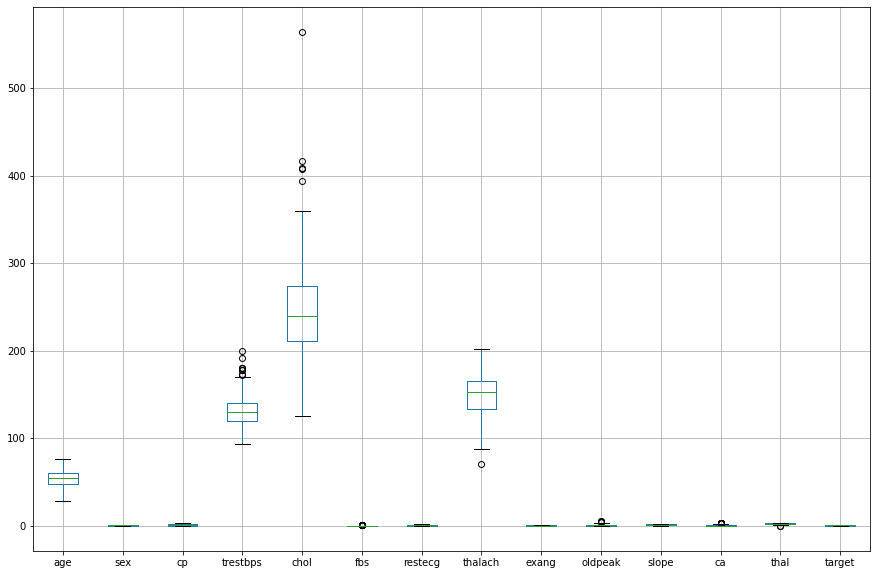

In [12]:
plt.figure(figsize=(15,10))
df.boxplot()

In [13]:
x = df.drop('target',axis = 1)
y = df['target']

# Feature Engineering


### Scaling

#### 1. Normalization

In [16]:
# x.head(2)

In [26]:
normal_scaler = MinMaxScaler()
x_scaled = normal_scaler.fit_transform(x)
x_normal_df = pd.DataFrame(x_scaled, columns= x.columns)
x_normal_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


#### 2. Standardization

In [48]:
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
x_std_df = pd.DataFrame(x_scaled, columns= x.columns)
x_std_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


# Train Test Split

In [49]:
# x_train, x_test, y_train, y_test = train_test_split(x_normal_df,y,test_size=0.2,random_state=1,stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_std_df,y,test_size=0.2,random_state=1,stratify=y)

# Train Model

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=11,p=1) 
# p = 2 >> Euclidean Distance
# p = 1 >>equivalent to using manhattan_distance
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

 # Evaluation

In [59]:
y_pred = knn_model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[23,  5],
       [ 4, 29]], dtype=int64)

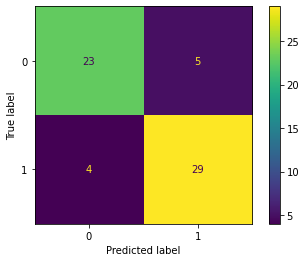

In [60]:
plot_confusion_matrix(knn_model,x_test,y_test)

In [61]:
accuracy_score(y_test, y_pred)

0.8524590163934426

In [54]:
clf_report = classification_report(y_test,y_pred)
print("classification Report :\n",clf_report)

classification Report :
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



# Hyperparameter Tuning

### 1. GridSearchCV

In [62]:
hyperparameters = {'n_neighbors':np.arange(2,30),
                   'p':[1,2]}
knn_model = KNeighborsClassifier() 
gscv_knn_model = GridSearchCV(knn_model,hyperparameters,cv = 5)

gscv_knn_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [63]:
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=20, p=1)

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=20, p=1) 
knn_model.fit(x_train,y_train)

y_pred = knn_model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[22,  6],
       [ 3, 30]], dtype=int64)

In [66]:
accuracy_score(y_pred, y_test)

0.8524590163934426

### 2. RandomizedSearchCV

In [68]:
hyperparameters = {'n_neighbors':np.arange(2,30),
                   'p':[1,2]}
knn_model = KNeighborsClassifier() 
rscv_knn_model =  RandomizedSearchCV(knn_model,hyperparameters,cv = 5)

rscv_knn_model.fit(x_train,y_train)
rscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [69]:
knn_model = KNeighborsClassifier(n_neighbors=7, p=2) 
knn_model.fit(x_train,y_train)

y_pred = knn_model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[21,  7],
       [ 5, 28]], dtype=int64)

In [70]:
accuracy_score(y_pred, y_test)

0.8032786885245902

# Elbow Method

In [81]:
acc_score_list = []
error_rate = []
for i in range(2,30):
    knn_model = KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(x_train,y_train)
    y_pred = knn_model.predict(x_test)
    acc_score = accuracy_score(y_pred,y_test)
    acc_score_list.append(acc_score)
    error_rate.append(np.mean(y_test != y_pred))
error_rate

[0.2786885245901639,
 0.2459016393442623,
 0.22950819672131148,
 0.21311475409836064,
 0.21311475409836064,
 0.19672131147540983,
 0.21311475409836064,
 0.19672131147540983,
 0.18032786885245902,
 0.16393442622950818,
 0.18032786885245902,
 0.16393442622950818,
 0.14754098360655737,
 0.16393442622950818,
 0.14754098360655737,
 0.14754098360655737,
 0.16393442622950818,
 0.16393442622950818,
 0.16393442622950818,
 0.16393442622950818,
 0.16393442622950818,
 0.16393442622950818,
 0.16393442622950818,
 0.16393442622950818,
 0.16393442622950818,
 0.16393442622950818,
 0.16393442622950818,
 0.16393442622950818]

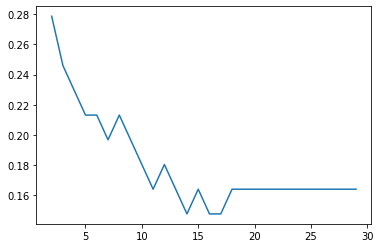

In [82]:
k = range(2,30)
plt.plot(k,error_rate)
